# ECE C247 - Neural Networks & Deep Learning, EEG Project
## Alexie Pogue, Amir Omidfar, Eric Peltola, Kenny Chen

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from models import *
from solver import *
from utils import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Parameters

In [0]:
LR      = 0.0005
BETAS   = (0.9, 0.999)
EPS     = 1e-08
DECAY   = 0.0005

BATCH_SIZE = 32
EPOCHS  = 100

# Data Setup

## Load Data

In [6]:
data_path = "/content/drive/Shared drives/ECE C247 Project/data/"

# load data files
X_train_valid, y_train_valid, X_test, y_test = load_data(data_path, subjects=[1], verbose=True)

Training/Valid data shape: (237, 22, 1000)
Test data shape: (50, 22, 1000)


## Preprocessing

In [0]:
# filter inputs
X_train_valid = filter_data(X_train_valid, fs=250, order=6, lowcut=7, highcut=30)
X_test = filter_data(X_test, fs=250, order=6, lowcut=7, highcut=30)

# smooth inputs
X_train_valid = smooth_data(X_train_valid, ws=5)
X_test = smooth_data(X_test, ws=5)

## PyTorch Dataloaders

In [0]:
# set up PyTorch dataloaders
data_loaders = dataloader_setup(X_train_valid, y_train_valid, X_test, y_test, batch_size=BATCH_SIZE)

# Model Comparison

## CNN

Training Progress: 	Epoch 1 [0/189 (0.00%)]		Loss: 1.38973
	Train loss: 0.04474, Accuracy: 47/189 (24.87%)
	Validation loss: 0.02912, Accuracy: 11/48 (22.92%)
	Test loss: 0.02792, Accuracy: 14/50 (28.00%)

Training Progress: 	Epoch 2 [0/189 (0.00%)]		Loss: 1.41781
	Train loss: 0.04543, Accuracy: 50/189 (26.46%)
	Validation loss: 0.02905, Accuracy: 12/48 (25.00%)
	Test loss: 0.02861, Accuracy: 10/50 (20.00%)

Training Progress: 	Epoch 3 [0/189 (0.00%)]		Loss: 1.31931
	Train loss: 0.04459, Accuracy: 50/189 (26.46%)
	Validation loss: 0.02803, Accuracy: 17/48 (35.42%)
	Test loss: 0.02855, Accuracy: 13/50 (26.00%)

Training Progress: 	Epoch 4 [0/189 (0.00%)]		Loss: 1.24885
	Train loss: 0.04399, Accuracy: 60/189 (31.75%)
	Validation loss: 0.02759, Accuracy: 18/48 (37.50%)
	Test loss: 0.02844, Accuracy: 16/50 (32.00%)

Training Progress: 	Epoch 5 [0/189 (0.00%)]		Loss: 1.39010
	Train loss: 0.04411, Accuracy: 51/189 (26.98%)
	Validation loss: 0.02751, Accuracy: 16/48 (33.33%)
	Test loss: 0.028

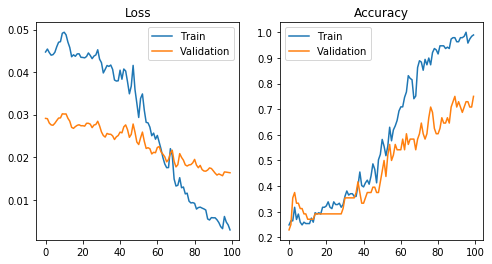

In [9]:
model = CNN().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

## LSTM

Training Progress: 	Epoch 1 [0/189 (0.00%)]		Loss: 1.44533
	Train loss: 0.04438, Accuracy: 46/189 (24.34%)
	Validation loss: 0.02883, Accuracy: 13/48 (27.08%)
	Test loss: 0.02784, Accuracy: 12/50 (24.00%)

Training Progress: 	Epoch 2 [0/189 (0.00%)]		Loss: 1.37439
	Train loss: 0.04465, Accuracy: 46/189 (24.34%)
	Validation loss: 0.02893, Accuracy: 13/48 (27.08%)
	Test loss: 0.02804, Accuracy: 12/50 (24.00%)

Training Progress: 	Epoch 3 [0/189 (0.00%)]		Loss: 1.39486
	Train loss: 0.04460, Accuracy: 46/189 (24.34%)
	Validation loss: 0.02891, Accuracy: 13/48 (27.08%)
	Test loss: 0.02803, Accuracy: 12/50 (24.00%)

Training Progress: 	Epoch 4 [0/189 (0.00%)]		Loss: 1.41325
	Train loss: 0.04442, Accuracy: 46/189 (24.34%)
	Validation loss: 0.02883, Accuracy: 13/48 (27.08%)
	Test loss: 0.02794, Accuracy: 12/50 (24.00%)

Training Progress: 	Epoch 5 [0/189 (0.00%)]		Loss: 1.33939
	Train loss: 0.04375, Accuracy: 50/189 (26.46%)
	Validation loss: 0.02863, Accuracy: 16/48 (33.33%)
	Test loss: 0.027

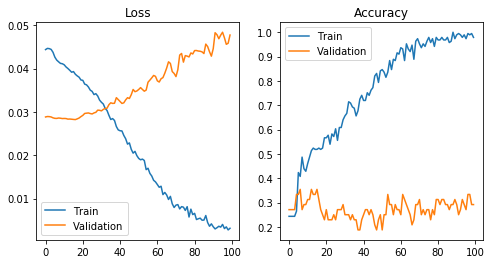

In [10]:
model = LSTM().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

## GRU

Training Progress: 	Epoch 1 [0/189 (0.00%)]		Loss: 1.37755
	Train loss: 0.04408, Accuracy: 47/189 (24.87%)
	Validation loss: 0.02925, Accuracy: 11/48 (22.92%)
	Test loss: 0.02777, Accuracy: 14/50 (28.00%)

Training Progress: 	Epoch 2 [0/189 (0.00%)]		Loss: 1.35174
	Train loss: 0.04391, Accuracy: 51/189 (26.98%)
	Validation loss: 0.02930, Accuracy: 11/48 (22.92%)
	Test loss: 0.02787, Accuracy: 14/50 (28.00%)

Training Progress: 	Epoch 3 [0/189 (0.00%)]		Loss: 1.39164
	Train loss: 0.04339, Accuracy: 54/189 (28.57%)
	Validation loss: 0.02901, Accuracy: 16/48 (33.33%)
	Test loss: 0.02790, Accuracy: 14/50 (28.00%)

Training Progress: 	Epoch 4 [0/189 (0.00%)]		Loss: 1.34929
	Train loss: 0.04269, Accuracy: 61/189 (32.28%)
	Validation loss: 0.02874, Accuracy: 17/48 (35.42%)
	Test loss: 0.02800, Accuracy: 15/50 (30.00%)

Training Progress: 	Epoch 5 [0/189 (0.00%)]		Loss: 1.38589
	Train loss: 0.04237, Accuracy: 63/189 (33.33%)
	Validation loss: 0.02853, Accuracy: 14/48 (29.17%)
	Test loss: 0.028

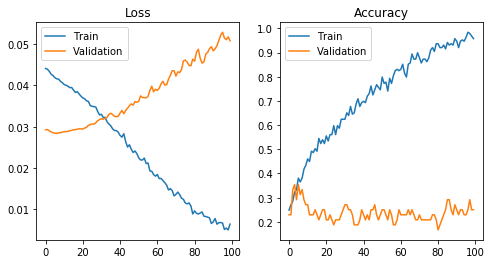

In [11]:
model = GRU().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

## CNN + LSTM

Training Progress: 	Epoch 1 [0/189 (0.00%)]		Loss: 1.39481
	Train loss: 0.04404, Accuracy: 46/189 (24.34%)
	Validation loss: 0.02886, Accuracy: 14/48 (29.17%)
	Test loss: 0.02779, Accuracy: 12/50 (24.00%)

Training Progress: 	Epoch 2 [0/189 (0.00%)]		Loss: 1.38964
	Train loss: 0.04402, Accuracy: 46/189 (24.34%)
	Validation loss: 0.02886, Accuracy: 14/48 (29.17%)
	Test loss: 0.02778, Accuracy: 12/50 (24.00%)

Training Progress: 	Epoch 3 [0/189 (0.00%)]		Loss: 1.38777
	Train loss: 0.04396, Accuracy: 69/189 (36.51%)
	Validation loss: 0.02882, Accuracy: 18/48 (37.50%)
	Test loss: 0.02774, Accuracy: 16/50 (32.00%)

Training Progress: 	Epoch 4 [0/189 (0.00%)]		Loss: 1.38580
	Train loss: 0.04367, Accuracy: 84/189 (44.44%)
	Validation loss: 0.02860, Accuracy: 24/48 (50.00%)
	Test loss: 0.02758, Accuracy: 23/50 (46.00%)

Training Progress: 	Epoch 5 [0/189 (0.00%)]		Loss: 1.38049
	Train loss: 0.04287, Accuracy: 87/189 (46.03%)
	Validation loss: 0.02801, Accuracy: 22/48 (45.83%)
	Test loss: 0.027

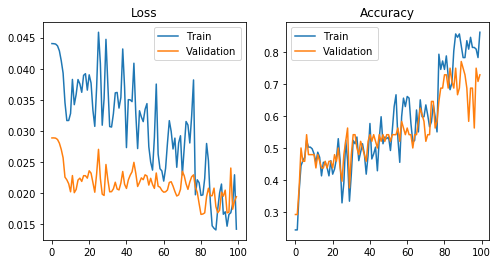

In [12]:
model = CNN_LSTM().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

## CNN + GRU

Training Progress: 	Epoch 1 [0/189 (0.00%)]		Loss: 1.40443
	Train loss: 0.04397, Accuracy: 54/189 (28.57%)
	Validation loss: 0.02897, Accuracy: 12/48 (25.00%)
	Test loss: 0.02770, Accuracy: 15/50 (30.00%)

Training Progress: 	Epoch 2 [0/189 (0.00%)]		Loss: 1.37999
	Train loss: 0.04379, Accuracy: 67/189 (35.45%)
	Validation loss: 0.02867, Accuracy: 17/48 (35.42%)
	Test loss: 0.02762, Accuracy: 15/50 (30.00%)

Training Progress: 	Epoch 3 [0/189 (0.00%)]		Loss: 1.37990
	Train loss: 0.04287, Accuracy: 73/189 (38.62%)
	Validation loss: 0.02779, Accuracy: 19/48 (39.58%)
	Test loss: 0.02712, Accuracy: 15/50 (30.00%)

Training Progress: 	Epoch 4 [0/189 (0.00%)]		Loss: 1.35690
	Train loss: 0.03971, Accuracy: 93/189 (49.21%)
	Validation loss: 0.02537, Accuracy: 20/48 (41.67%)
	Test loss: 0.02531, Accuracy: 20/50 (40.00%)

Training Progress: 	Epoch 5 [0/189 (0.00%)]		Loss: 1.27150
	Train loss: 0.03506, Accuracy: 95/189 (50.26%)
	Validation loss: 0.02217, Accuracy: 23/48 (47.92%)
	Test loss: 0.022

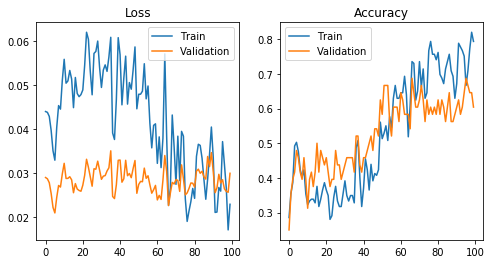

In [13]:
model = CNN_GRU().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)